# Seattle - A Story of Growth
## Building Permits Data Analysis

Priyanka Mhatre  
DATA 512 Human Centered Data Science  
A6: Final Project  
University of Washington, Fall 2018  

### Introduction

According to a recent [article](https://www.seattletimes.com/seattle-news/data/114000-more-people-seattle-now-this-decades-fastest-growing-big-city-in-all-of-united-states/) in *“The Seattle Times”*, Seattle is now the decade’s fastest-growing big city in the United States. As of July 2017, Seattle has grown by a staggering 18.7 percent in the last seven years which ranks as the fastest rate of growth among the 50 largest U.S. cities<sup>[1](https://www.seattletimes.com/seattle-news/data/114000-more-people-seattle-now-this-decades-fastest-growing-big-city-in-all-of-united-states/)</sup>. Another interesting way of measuring the growth of the city can be in terms of the number of new construction projects. The constant sight of construction cranes has now become an integral part of Seattle’s skyline. 
  
The [Seattle Department of Construction and Inspections (SDCI)](http://www.seattle.gov/sdci) has made available the data on building permits to the public through the [Open Data Program](http://www.seattle.gov/tech/initiatives/open-data). The dataset includes all building permits issued or in progress within the city of Seattle since 1986.
  
For my final project for DATA 512: Human Centered Data Science, I analyzed this dataset in order to gain a better understanding of the growth of Seattle in terms of real estate. I hope to discover some interesting trends or patterns from the data and find answers to some specific research questions listed [here](#research).  

### Motivation

I moved to the city of Seattle in 2017 and have seen it grow explosively in the last one year. After reading recent news articles on the construction boom happening in Seattle, I have been intrigued by the rapid growth of the city. It am interested in analyzing the different ways in which the city is growing.   
  
My analysis can be useful to any resident of Seattle who is interested in investing their hard-earned money in real estate by identifying the fast-growing regions within Seattle. This analysis can also be useful to the city of Seattle government to gain an overview of the recent development in different neighborhoods of Seattle which can be helpful for urban planning including transportation, roads, recreation areas, traffic management and other services.

### <a name="research"></a>Research Questions
  
The two primary research questions for my analysis are:  
  
1)	How has the city grown in the last two decades?  
2)	Which are the fastest growing neighborhoods within Seattle?  
  
This study is more of an exploratory analysis to discover interesting patterns and insights from the data. It is also aims to test the hypothesis that Seattle has grown rapidly in the past five years and continues to grow at an increasing rate.  

### <a name="data_sources"></a>Data Sources

We will be using the below two data sources for this analysis:
  
**1) Building Permits Data:**  
  
The main dataset used for this analysis is the Building Permits data made publicly available by the City of Seattle on their [website](https://data.seattle.gov/Permitting/Building-Permits/76t5-zqzr).  
The dataset has around 120K rows and 24 columns. The dataset is updated on a daily basis and can be accessed via the [Socrate API](https://dev.socrata.com/foundry/data.seattle.gov/k44w-2dcq). It can also be directly downloaded as a csv from the same API website under the Download & Export section. Please note that if you choose to download the latest file from the website, it will have additional data and the inferences made in this analysis may change accordingly. 
  
Due to limitations on size, I could not upload this file to the github repository. To reproduce the exact same analysis, you can use intermediate data files listed below which are available under the data folder.
  
For more information about the API and dataset, refer : https://dev.socrata.com/foundry/data.seattle.gov/k44w-2dcq  
  
**2) Seattle Neighborhoods:**  

This dataset is used to get the neighborhood names for the building permits. It contains geospatial delineation of neighborhood boundaries used by the City Clerks Office. It is publicly available on the Seattle Government website [here](https://data.seattle.gov/dataset/Neighborhoods/2mbt-aqqx) and can be downloaded directly as a zip file. 

A downloaded version of this dataset (downloaded on 19 Nov 2018) is included in the data folder of this github repository to enable complete reproducibility.

**Intermediate Files**
  
File name: **data/New_Permits.csv**  
This is the original Permits data file after filtering on "New" PermitClassDesc.
  
File name: **data/New_Permits_Cleaned.csv**  
This is a cleaned version of the new permits data file above.

File name: **data/New_Permits_SubRegions.csv**  
This is a file with sub_regions and corresponding counts of new permits since 2011.

  
### Data Limitations
The data is about building permits which were submitted to the Seattle Department of Construction (SDCI) for approvals. There is no information about whether the project was completed or not. There might be cases where the permit was issued but the project was scrapped due to some reason. Since I did not find a publicly available dataset having information about completed projects, for the sake of simplicity I will make an assumption that most of the proposed projects with an issued permit were completed.  
 
All results from this analysis need to be interpreted by taking the above assumptions and limitations into account.  

### License:

1) Building Permits Data: The data is owned by Seattle Department of Construction (SDCI) 
  
2) Neighborhoods Data: The data is provided by Seattle Public Utilities and owned by the Seattle City GIS Program. 
  
Both the datasets above are made available to the public  under the [Public Domain License](https://wiki.creativecommons.org/wiki/Public_domain) which allows free use by anyone for any purpose without restriction under copyright law.  

The City of Seattle Government requires the users of this data to include the following disclaimers: 

*"The data made available here has been modified for use from its original source, which is the City of Seattle. Neither the City of Seattle nor the Office of the Chief Technology Officer (OCTO) makes any claims as to the completeness, timeliness, accuracy or content of any data contained in this application; makes any representation of any kind, including, but not limited to, warranty of the accuracy or fitness for a particular use; nor are any such warranties to be implied or inferred with respect to the information or data furnished herein. The data is subject to change as modifications and updates are complete. It is understood that the information contained in the web feed is being used at one's own risk."*  
 

### Reproducibility
  
This analysis is designed to be completely reproducible by following the best practices for performing and sharing open research. By following the notebook and instructions below, it is possible for anyone to reproduce this analysis. 
  
For exact reproducibility, clone the repository from github alongwith the data files.  
`git clone https://github.com/priyankam22/DATA-512-Human-Centered-Data-Science/tree/master/data512-final-project`

Let us start by importing the required python libraries.

### Initial Setup

You will need to download the below python packages if they do not exist in your Python installation.

If you use pip for package management:

`pip install pandas`   
`pip install numpy`  
`pip install seaborn`  
`pip install matplotlib`  

`pip install fiona`  
`pip install shapely`  
`pip install geopandas`

  
If you have Anaconda installation:
  
`conda install -c anaconda pandas`    
`conda install -c anaconda numpy`  
`conda install -c anaconda seaborn`  
`conda install -c anaconda matplotlib`

`conda install -c conda-forge fiona`    
`conda install -c conda-forge shapely`  
`conda install -c conda-forge geopandas`

### Import python libraries

Let's start by importing the required python libraries.

In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Spatial data analysis
# For analyzing multi-layered GIS formats like shape files
import fiona 
# For manipulation and analysis of geometric objects in the Cartesian plane.
from shapely.geometry import Point, shape 
# For reading geo-spatial data in pandas style
import geopandas as gpd

# General 
from datetime import datetime
import time
import re

### Load datasets

We will now load the two datasets available in the data folder of this repository. For downloading fresh copies of the data, refer section [Data Sources](#data_sources).

**1) Building_Permits.csv : **

This is the Building Permits data stored as a csv file.  

In [2]:
# Load the permits dataset
permits = pd.read_csv('data/Building_Permits.csv')

# Check the number of records
print("Permits Shape:", permits.shape)

Permits Shape: (119760, 24)


There are 119760 total rows in the dataset where each row represents a permit application. There are 24 columns in the dataset.

**2) Neighborhoods.shp: **
    
This is the Neighborhoods shape file under the `data\Neighborhoods\WGS84` folder. Note that we need all  the other files under the WGS84 folder as well in order to read the shape file as the shape file has dependencies on these files. WGS84 is a standard for representing geospatial data. If you download the Neighborhoods dataset from the website, you will notice another folder 'StatePlane' which can be ignored for this analysis.

In [3]:
neighborhoods_fn = "data/Neighborhoods/WGS84/Neighborhoods.shp"
neighborhoods = gpd.read_file(neighborhoods_fn)

# Check the number of records
print("Neighborhoods Shape:", neighborhoods.shape)

Neighborhoods Shape: (119, 13)


There are 119 rows and 13 columns. Each row corresponds to a neighborhood in Seattle. Let us explore the data in more detail.

### Initial Data Exploration

Let's explore the data to get a better understanding of the dataset.

#### Explore Neighborhoods Data

In [4]:
neighborhoods.head()

,OBJECTID,AREA,PERIMETER,HOODS_,HOODS_ID,S_HOOD,L_HOOD,L_HOODID,SYMBOL,SYMBOL2,SHAPE_AREA,SHAPE_LEN,geometry
0,1,3588.443,617.843,2,0,OOO,None,0,0,0,0.0,0.0,"POLYGON ((-122.27397895294 47.69522647266366, ..."
1,2,22294.777,733.568,3,0,OOO,None,0,0,0,0.0,0.0,"POLYGON ((-122.2875597861966 47.6452274048213,..."
2,3,56695.367,4088.442,5,0,OOO,None,0,0,0,0.0,0.0,POLYGON ((-122.3952908582122 47.66513504453929...
3,4,64156.813,1809.446,6,0,OOO,None,0,0,0,0.0,0.0,POLYGON ((-122.3983207858678 47.66608770690771...
4,5,2993.164,250.330,7,0,OOO,None,0,0,0,0.0,0.0,POLYGON ((-122.2885127664105 47.65630022774356...


We are interested in the geometry column of the neighborhoods dataset. It provides the geographical boundaries for the corresponding neighborhood. This spatial column can be used to map any geographical location described as a spatial point (latitude, longitude) with the corresponding neighborhood.

The neighborhood names are stored in the L_HOOD (region) and S_HOOD (sub_region) column. Let us check the different values for these columns.

In [5]:
neighborhoods['L_HOOD'].value_counts()

NO BROADER TERM        22
WEST SEATTLE            8
DOWNTOWN                7
RAINIER VALLEY          6
DELRIDGE                6
CENTRAL AREA            6
BALLARD                 5
CAPITOL HILL            5
LAKE CITY               5
NORTHGATE               4
QUEEN ANNE              4
BEACON HILL             4
CASCADE                 3
MAGNOLIA                3
UNIVERSITY DISTRICT     1
INTERBAY                1
SEWARD PARK             1
Name: L_HOOD, dtype: int64

In [6]:
neighborhoods['S_HOOD'].value_counts()

OOO                       26
Industrial District        2
Matthews Beach             1
North Admiral              1
Rainier View               1
Briarcliff                 1
North Queen Anne           1
Southeast Magnolia         1
Alki                       1
North College Park         1
West Queen Anne            1
North Delridge             1
Ravenna                    1
Crown Hill                 1
Riverview                  1
West Woodland              1
Belltown                   1
View Ridge                 1
Wedgwood                   1
University District        1
Mann                       1
Sunset Hill                1
Pinehurst                  1
Sand Point                 1
Meadowbrook                1
Victory Heights            1
High Point                 1
South Delridge             1
Pioneer Square             1
Roosevelt                  1
                          ..
Leschi                     1
Seward Park                1
Laurelhurst                1
Holly Park    

The S_HOOD column represents more granular level neighborhood than L_HOOD. We will analyze data at this sub_region level.

#### Explore Permits Data

In [7]:
permits.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location_1
0,6086767-CN,Commercial,Non-Residential,Building,New,Phase II of III for construction of a mixed us...,NaN,0.0,0.0,7700000.0,...,Completed,809 OLIVE WAY,SEATTLE,WA,98101.0,"WASHINGTON HANOVER,LLC",https://cosaccela.seattle.gov/portal/customize...,47.613975,-122.333528,"809 OLIVE WAY\nSEATTLE, WA 98101\n(47.61397452..."
1,6654859-CN,Commercial,Non-Residential,Building,NONE,Re-Roof Apartment Building for Mono Rooftop S...,NaN,NaN,NaN,NaN,...,Issued,201 W OLYMPIC PL,SEATTLE,WA,98119.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.626438,-122.359578,"201 W OLYMPIC PL\nSEATTLE, WA 98119\n(47.62643..."
2,6414155-EX,Single Family/Duplex,Residential,Building,Environmentally Critical Area Exemption,Exception/Exemption Request for: CLOSED AS INC...,NaN,NaN,NaN,NaN,...,Completed,6504 24TH AVE SW,SEATTLE,WA,98106.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.544636,-122.364054,"6504 24TH AVE SW\nSEATTLE, WA 98106\n(47.54463..."
3,6588866-CN,Commercial,Non-Residential,Building,Addition/Alteration,Construct alterations for accessible ramp at e...,NaN,0.0,0.0,175000.0,...,Corrections Required,2401 UTAH AVE S,SEATTLE,WA,98134.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.581818,-122.335358,"2401 UTAH AVE S\nSEATTLE, WA 98134\n(47.581818..."
4,6339570-CN,Commercial,Non-Residential,Building,Addition/Alteration,Alterations to existing retail space (Suite A)...,NaN,0.0,0.0,211118.0,...,Completed,5240 UNIVERSITY WAY NE,SEATTLE,WA,98105.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.667616,-122.312733,"5240 UNIVERSITY WAY NE\nSEATTLE, WA 98105\n(47..."


We can see that the dataset different kinds of permits - check column "PermitTypeDec" above. It has values "New" as well as "Addition/Alteration". 
  
Let us visualize the type of permits in more detail.

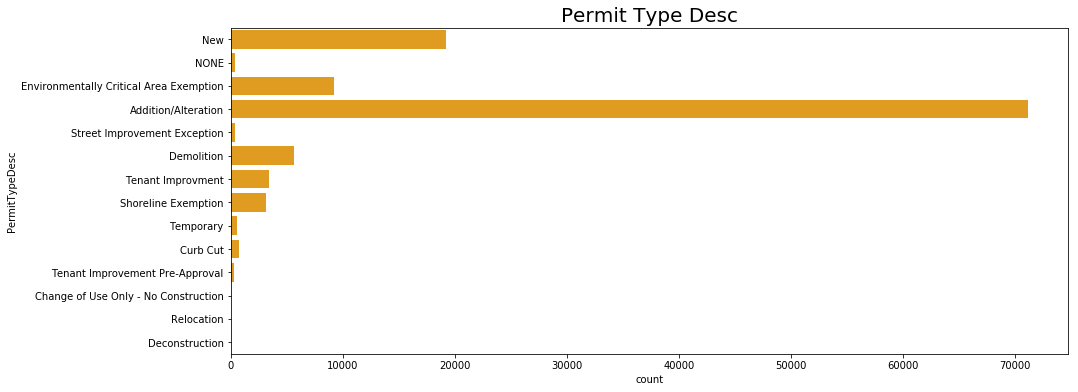

In [8]:
# Plot a barplot for the PermitTypeDesc column
plt.figure(figsize=(15,6))
sns.countplot(y=permits.PermitTypeDesc, color='orange')
plt.title("Permit Type Desc", fontsize=20)
plt.show()

We can see from above plot that majority of the permits are of type "Addition/Alteration". Let us look at what kind of changes are included in this Permit Type.

In [9]:
# Expand the max column width to view full description.
pd.options.display.max_colwidth = 100

In [10]:
permits[permits["PermitTypeDesc"] == 'Addition/Alteration']['Description'][0:10]

3        Construct alterations for accessible ramp at existing south commercial building entry, per plan.
4       Alterations to existing retail space (Suite A) to change use to restaurant and occupy, per plans.
6                 interior alterations to exisiting basement per plan subject to field inspection (STFI).
7             REPLACE EXISTG ROCKERY WITH NEW SEG BLOCK RETAING WALL AT SINGLE FAMILY DWELLING, PER PLANS
9                           Construct new dormer addition to existing single fmaily residence, per (STFI)
10                                          Interior Tenant Improvement for a Jewelry Showroom and Office
11    Construct addition to and interior alterations to existing single-family dwelling per plot plan ...
12    Closed as Incomplete - Expired Permit    Non-structural interior alterations and storefront revi...
13                        Construct tenant improvement for Sky view observation café renovation, per plan
14                                        Volu

As seen above, Addition/Alteration Permits mostly include alterations to interiors or minor structural extensions. These do not really represent growth. Also, none of the other Permit Types except "New" are relevant to our research questions. 

The below are the numerical counts of each of the Permit Types. 

In [11]:
permits.PermitTypeDesc.value_counts()

Addition/Alteration                        71130
New                                        19168
Environmentally Critical Area Exemption     9175
Demolition                                  5661
Tenant Improvment                           3419
Shoreline Exemption                         3110
Curb Cut                                     698
Temporary                                    568
Street Improvement Exception                 396
NONE                                         388
Tenant Improvement Pre-Approval              249
Deconstruction                                24
Relocation                                    19
Change of Use Only - No Construction          17
Name: PermitTypeDesc, dtype: int64

We need to filter the dataset on "New" permits and perform further analysis on this smaller subset of 19168 rows.

In [12]:
new_permits = permits[permits.PermitTypeDesc == 'New']

In [13]:
# Save this intermediate file for reproducibility
new_permits.to_csv("data/New_Permits.csv", index=False)

If you are reproducing the analysis from this point, uncomment the below and execute to load the intermediate file.

In [14]:
#new_permits = pd.read_csv("data/New_Permits.csv")
#print("New Permits Shape:", new_permits.shape)

### Data Cleaning

#### Handle Missing Values

We need to check for missing values in the other columns. This will help us decide which columns can be used for analysis and which need to be dropped.

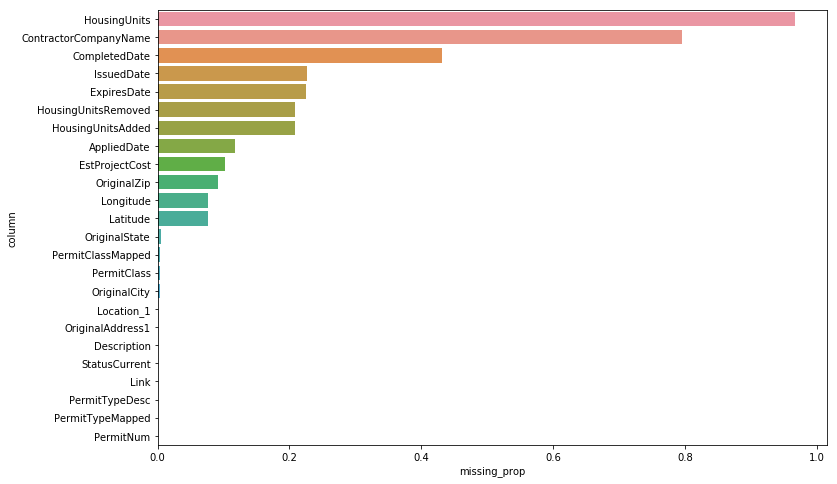

In [15]:
# Calculate the proportion of missing values in each column
missing_prop = pd.DataFrame(new_permits.isnull().mean()).reset_index()
missing_prop.columns = ['column','missing_prop']

# Plot the proportion of missing values in descending order
plt.figure(figsize=(12,8))
sns.barplot(x='missing_prop', y='column', data=missing_prop.sort_values(by='missing_prop',ascending=False))
plt.show()

For our research question, we need a date for the permit. We have four dates in this dataset - AppliedDate, IssuedDate, ExpiresDate and CompletedDate. CompletedDate sounds like a relevant column but it has almost 50% missing values.The column "StatusCurrent" has zero missing values.  
Let us check the status of columns with missing CompletedDate.

In [16]:
new_permits[new_permits['CompletedDate'].isnull()]['StatusCurrent'].value_counts()

Issued                       1815
Closed                       1516
Completed                    1260
Canceled                      900
Expired                       759
Corrections Required          574
Additional Info Requested     535
Reviews In Process            421
Reviews Completed             232
Application Completed          68
Scheduled                      49
Withdrawn                      40
Ready for Issuance             33
Ready for Intake               23
Initiated                      15
Corrections Submitted          15
Scheduled and Submitted        10
Inspections Completed          10
Approved to Occupy              7
Reviews in Process              4
Name: StatusCurrent, dtype: int64

As seen above, there are permits with 'Completed', 'Issued' or 'Closed' Status which do not have a CompletedDate. Thus we cannot rely on the CompletedDate column.  
  
Applied Date seems to have the least number of missing values.

In [17]:
missing_prop[missing_prop.column == 'AppliedDate']

,column,missing_prop
10,AppliedDate,0.117279


11.72% of the applied dates are missing. Let us exclude these columns from analysis to keep things simple. 
  
Missing data can be noted as a limitation of this approach.

In [20]:
# Check the number of records
print("Permits Shape Before:", permits.shape)

new_permits.drop(new_permits[new_permits.AppliedDate.isnull()].index, inplace=True)

# Check the number of records
print("Permits Shape After:", new_permits.shape)

Permits Shape Before: (119760, 24)
Permits Shape After: (16920, 24)


#### Feature Creation

Let us extract year from AppliedDate. It is important to remember that we will be analyzing the data using the year in which permit was applied. It should not be interpreted as the year in which permit or actual construction project was completed.

In [21]:
# Extract Year from AppliedDate
new_permits['YearApplied'] = new_permits.AppliedDate.apply(lambda x: x[:4] if isinstance(x, str) else None)

#### Filter Incomplete or Expired Permits

Are all these permits issued or completed? To check this, let's look at the distribution of the new permits by current status.

In [22]:
new_permits.StatusCurrent.value_counts()

Completed                    11952
Issued                        1814
Expired                        880
Canceled                       832
Corrections Required           573
Reviews In Process             421
Reviews Completed              232
Application Completed           68
Inspections Completed           52
Ready for Issuance              33
Approved to Occupy              24
Withdrawn                       19
Corrections Submitted           15
Reviews in Process               4
Additional Info Requested        1
Name: StatusCurrent, dtype: int64

We can use the AppliedDate column to check the validity of these values of status. First lets convert the AppliedDate to a datetime for correct comparison.

In [23]:
new_permits["AppliedDateDT"] = new_permits['AppliedDate'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d') if x is not np.nan else None)

In [24]:
new_permits[['StatusCurrent','AppliedDateDT']].groupby('StatusCurrent').agg(['min','max','count'])

AppliedDateDT                  
                                    min        max  count
StatusCurrent                                            
Additional Info Requested    2018-09-18 2018-09-18      1
Application Completed        2004-01-21 2018-11-16     68
Approved to Occupy           2006-09-24 2016-09-30     24
Canceled                     2000-10-17 2018-01-11    832
Completed                    1992-06-09 2018-08-24  11952
Corrections Required         2009-03-18 2018-10-08    573
Corrections Submitted        2016-12-23 2018-08-30     15
Expired                      1989-02-27 2017-05-12    880
Inspections Completed        2006-08-14 2018-07-30     52
Issued                       1989-07-26 2018-10-26   1814
Ready for Issuance           2007-03-23 2018-09-05     33
Reviews Completed            2014-10-29 2018-10-15    232
Reviews In Process           2005-07-14 2018-11-16    421
Reviews in Process           2016-07-20 2018-10-10      4
Withdrawn                    2005-09-21 2018-09-13     19

The dataset did not include defintions for each of these status types. Looking at the status values, it is difficult to deduce the order and reliability of the different status values. For purposes of this analysis, I will make a best guess at what the status means based on the wording. My aim is to remove rows with permits which were not issued. All other permits will be considered completed or in progress.

Some of these intermediate stages like 'Ready for Issuance' or 'Approved to Occupy' might be intermediate stages or final stages in the process. For simplicity sake, we will assume these are all final stages where the permit was issued since there are older dates which have this status.

We can exclude the permits with values - 'Canceled','Expired' and 'Withdrawn' as these indicate that the permit was not used.

In [25]:
# Remove incomplete permits
new_permits = new_permits[~new_permits.StatusCurrent.isin(['Canceled','Expired','Withdrawn'])]

# Check the number of records
print("Permits Shape:", new_permits.shape)

Permits Shape: (15189, 26)


Let us look at the description of Permits again to eyeball any unusual cases.

In [26]:
new_permits[['StatusCurrent','Description']][0:10]

,StatusCurrent,Description
0,Completed,"Phase II of III for construction of a mixed use high-rise bldg with basmt parking, foundation & ..."
42,Issued,Establish use and construct single family dwelling per plan.
57,Issued,"Establish use as and construct a single-family residence, per plans."
82,Completed,Closed as Incomplete - Expired Permit Construct carriage house (1-unit w/attached 3 car garag...
99,Completed,"Eight live-work units totaling 11,291 sq.ft. with surface parking for eight vehicles. Two, 2-un..."
106,Completed,Closed as Incomplete - Expired Permit CONSTRUCT ATTACHED GARAGE AND ACCESSORY DWELLING UNIT T...
112,Completed,"Establish use as and construct new SFR with attached garage, per plan."
130,Issued,"Establish use as and construct new single family residence, per plan."
135,Issued,"Construct new West duplex Unit B, per plan. (Establish use as townhouse and construct 2 new dupl..."
158,Reviews Completed,"Construct new West multifamily building, occupy per plan (Establish use as apartment and constru..."


Notice that row with index 82. It has a Completed Status but the description says that it is closed as incomplete.  Lets check if we have more of these rows.

In [27]:
new_permits[new_permits['Description'].str.contains('Closed as Incomplete - Expired Permit', flags=re.IGNORECASE, na=False, regex=True)]['Description'][0:10]

82      Closed as Incomplete - Expired Permit    Construct carriage house (1-unit w/attached 3 car garag...
106     Closed as Incomplete - Expired Permit    CONSTRUCT ATTACHED GARAGE AND ACCESSORY DWELLING UNIT T...
678     CLOSED AS INCOMPLETE - EXPIRED PERMIT. Demolish existing single family residence and establish u...
1312    Closed as Incomplete - Expired Permit    Establish use for single family residence, construct ne...
1627    CLOSED AS INCOMPLETE - EXPIRED PERMIT. Establish use as one single family residence - construct ...
1717    CLOSED AS INCOMPLETE - EXPIRED PERMIT. construct 2nd story addition to existing single family re...
1885    Closed as Incomplete - Expired Permit    Establish use as single family residence and construct ...
2023    CLOSED AS INCOMPLETE - EXPIRED PERMIT. Establish use as and construct new single family residenc...
2037    CLOSED AS INCOMPLETE - EXPIRED PERMIT. Establish use as and construct NE single family residence...
2210    CLOSED AS INCOMPLETE

It would be reasonable to exclude these permits from the analysis.

In [28]:
# Drop the Permits which were closed as mentioned in the Desscription
new_permits.drop(new_permits[new_permits['Description'].str.contains('closed as incomplete', flags=re.IGNORECASE, na=False, regex=True)].index, inplace=True)

# Check the number of records
print("Permits Shape:", new_permits.shape)

Permits Shape: (14046, 26)


In [29]:
# Save this intermediate file for reproducibility
new_permits.to_csv("data/New_Permits_Cleaned.csv", index=False)

If you are reproducing the analysis from this point, uncomment the below to load the intermediate file.

In [30]:
#new_permits = pd.read_csv("data/New_Permits_Cleaned.csv")
#print("New Permits Shape:", new_permits.shape)

### Yearly Trends in New Permits 

Let us check the distribution of new permits by Applied Year,

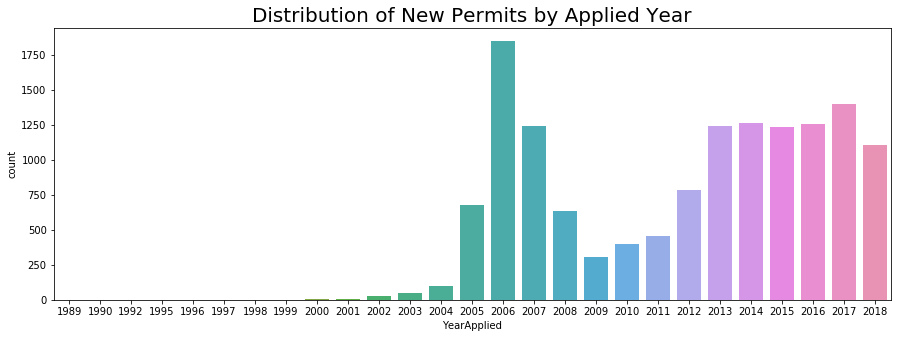

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(new_permits['YearApplied'])
plt.title('Distribution of New Permits by Applied Year', fontsize=20)
plt.show()

We can see there is an interesting trend in the distribution of new permits. There was a peak in 2006 followed by a dip in 2009. There is again an increasing trend in recent years. Note that the dataset has incomplete data for 2018 and hence we see a dip in 2018. We will have to limit our analysis till 2017.

Let us store the counts and create a lineplot to visualize the trends in different Permit classes from last two decades.

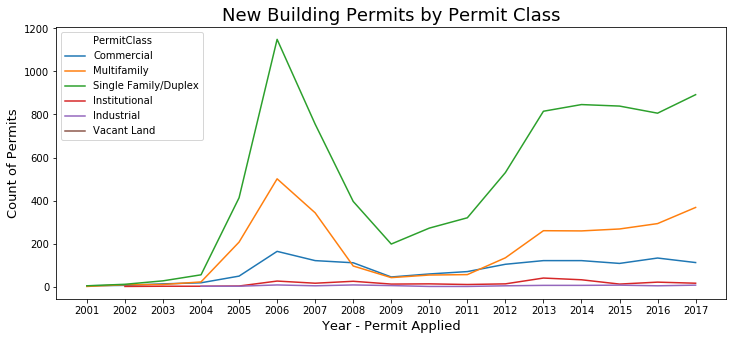

In [32]:
new_permits_by_class = new_permits[['YearApplied','PermitClass','PermitNum']].groupby(['YearApplied','PermitClass'], as_index=False).count()
new_permits_by_class= new_permits_by_class[new_permits_by_class['YearApplied'].isin([str(y) for y in range(2001,2018)])]

plt.figure(figsize=(12,5))
sns.lineplot(x='YearApplied', y='PermitNum', data=new_permits_by_class, hue='PermitClass', )
plt.xlabel('Year - Permit Applied', fontsize=13)
plt.ylabel('Count of Permits', fontsize=13)
plt.title('New Building Permits by Permit Class', fontsize=18)
plt.show()

#### Findings

We can see the distribution of permits by class in the above lineplots and also the yearly trends for each class. The number of permits for each class are as expected. Number of single family/duplex home permits will be greater than the number of Multifamily apartment buildings.
  
The trends show a clear sharp peak in the year 2006 which can be exlained by the huge housing bubble during that time which later burst in 2008 leading to recession. The sharp dip during 2009 corresponds to the recession period. Notice that there are huge dips in the residential types as compared to the non-residential types. 
  
We can see that the number of new permits has been steadily increasing since 2009. Between 2013 and 2016, we can see that the permits for single family homes dipped slightly in 2016 only to rise sharply in 2017. On the other hand, it is interesting to note that the Multifamily permits have risen geadually till 2016 and sharply in 2017. 

### Fastest Growing Neighborhoods

 #### Get the neighborhood names from the geographical coordinates

Lets look at the geometry column to understand how it works.

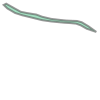

In [33]:
neighborhoods.geometry[0]

Fiona is an excellent library to work with multi-layered GIS files like the neighborhoods shape file. We will use this library to join the Permits data with the Neighborhoods dataset.  
  
We will define a function to check whether the location point of the permit represented by the latitude and longitude columns lies within any of the region boundaries specified in the geometry column of the Neighborhoods dataset. The function wll return the index of the first matching region from the neighborhoods dataset.


In [34]:
# Function to join the spatial points coordinates to the polygon neighborhood shapes in the shape file.
def coord_to_neighborhood(long, lat, shape_file):
    '''
    Takes as input the latitude and longitude of a point, alongwith shape file.
    Finds all the regions in the shape file such that the point lies within the boundaries of the region.
    Returns the index of the first matching index.
    '''
    point_cord = Point(long, lat)   
    with fiona.open(shape_file) as shp:
        regions = [reg for reg in shp]
    reg_idx = [ind for ind, reg in enumerate(regions)
                if point_cord.within(shape(reg['geometry']))]
    if not reg_idx:
        return None
    else:
        # Take first matching region. There can be more than one if the point falls on a border.
        return reg_idx[0]

Call the function for all permits to get the index of the first matching neighborhood name.

In [35]:
# Get the list of indices from the neighboorhoods shape file that match the point cordinates (latitude, longitude) for all permits
nbr_idx = [coord_to_neighborhood(new_permits['Longitude'].iloc[i], new_permits['Latitude'].iloc[i], neighborhoods_fn) for i in range(len(new_permits))]

Create a new column to store the sub_region for each permit and populate it.

In [36]:
# Populate sub_region from the neighborhood file
new_permits['sub_region'] = [neighborhoods.iloc[idx].loc['S_HOOD'] if idx else None for idx in nbr_idx]

In [37]:
# Check the populated column
new_permits['sub_region'][0:10]

0      Central Business District
42                    Briarcliff
57                 Rainier Beach
99                    Green Lake
112                  Mount Baker
130                     Atlantic
135                   Maple Leaf
158                     Broadway
182                   Maple Leaf
214                      Ravenna
Name: sub_region, dtype: object

In [38]:
# Check the number of unique sub_regions in the data
new_permits['sub_region'].nunique()

90

Let us aggregate the number of new permits by sub_region. We will focus on data since 2011 as the recent trends are more relevant to our research question.

In [39]:
# Filter the data by recent years
new_permits_recent = new_permits[new_permits['YearApplied'].isin([str(yr) for yr in range(2011,2018)])]

# Aggregate the permits by sub_region
new_permits_subregion = new_permits_recent[['sub_region','PermitNum']].groupby('sub_region', as_index=False).count()

# Rename columns for better clarity
new_permits_subregion.rename(columns={'PermitNum':'PermitsCount'}, inplace=True)

# Sort the sub_regions by decreasing Permit counts
new_permits_subregion.sort_values(by='PermitsCount', inplace=True, ascending=False)

In [51]:
# Save this intermediate file for reproducibility
new_permits_subregion.to_csv("data/New_Permits_SubRegions.csv", index=False)

If you are reproducing the analysis from this point, uncomment the below and execute to load the intermediate file.

In [44]:
#new_permits_subregion = pd.read_csv("data/New_Permits_SubRegions.csv")
#print("New Permits SubRegions Shape:", new_permits_subregion.shape)

Let us visualize the top 12 fastest growing neighborhoods in Seattle since 2011 by number of new permits applied.

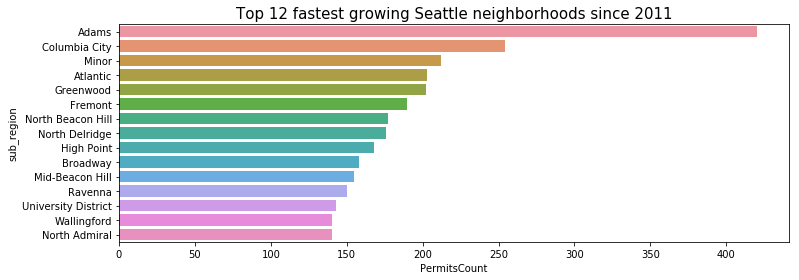

In [45]:
# Plot the Top 12 neighborhoods
plt.figure(figsize=(12,4))
sns.barplot(y='sub_region',x='PermitsCount', data=new_permits_subregion[0:15])
plt.title("Top 12 fastest growing Seattle neighborhoods since 2011", fontsize=15)
plt.show()

It will more informative to plot the number of new permits on a Seattle map.  
  
We need to merge the New Permits counts with the neighborhood data for this purpose.

In [46]:
# Merge the New Permits counts with the neighborhoods data
subregion_map_data = neighborhoods.merge(new_permits_subregion, left_on='S_HOOD', right_on='sub_region')

In [47]:
# Store the minimum and maximum permit counts 
min_count = subregion_map_data['PermitsCount'].min()
max_count = subregion_map_data['PermitsCount'].max()

print("Minimum number of Permits: ", min_count)
print("Maximum number of Permits: ", max_count)

Minimum number of Permits:  3
Maximum number of Permits:  420


For better readability on the map plot, we will only label the top 12 fastest growing neighborhoods on the map.

In [48]:
# Get the top 12 fastest growing subregions
top_nbrs = new_permits_subregion[0:12]['sub_region']

# Get the region boundaries for these top 12 sub regions
label_coords = subregion_map_data[subregion_map_data['sub_region'].isin(top_nbrs)][['sub_region','geometry']]

# Create a new column and populate with a randomly chosen representative point within each region
label_coords['coords'] = label_coords['geometry'].apply(lambda x: x.representative_point().coords[:])
label_coords['coords'] = [coords[0] for coords in label_coords['coords']]

We will now plot the geographical choropleth using matplotlib.

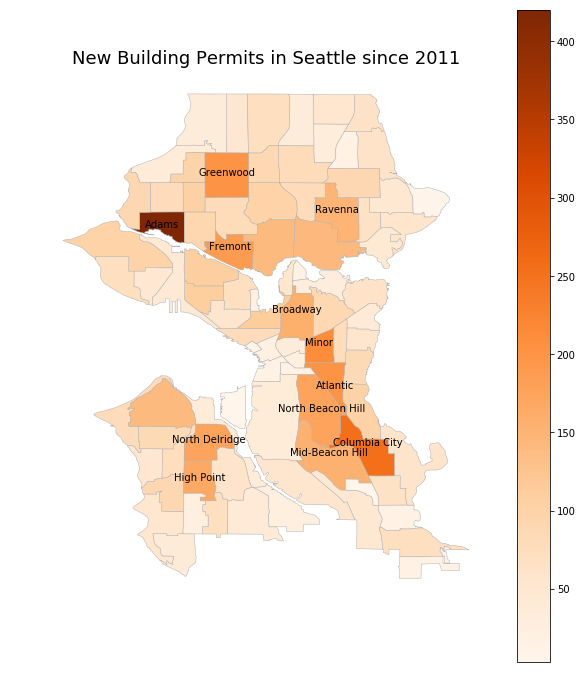

In [49]:
# Create figure and axes
fig, ax = plt.subplots(1, figsize=(10, 12))
# Plot the map using PermitsCount Data
subregion_map_data.plot(column='PermitsCount', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.7')
# Remove the axis
ax.axis('off')
# Add a title
ax.set_title('New Building Permits in Seattle since 2011', fontdict={'fontsize': '18', 'fontweight' : '3'})
# Create a legend using a Color Bar
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=min_count, vmax=max_count))
# Set empty array
sm._A = []
# Add the colorbar to the figure
cbar = fig.colorbar(sm)
# Label the regions
for idx, row in label_coords.iterrows():
    plt.annotate(s=row['sub_region'], xy=row['coords'], horizontalalignment='center')

#### Findings

As seen in the above choropleth, we can make below observations:  
    1) Adams near Old Ballard in the North West is the fastest growing neighborhood with 420 new building permits since 2011.  
    2) Columbia City situated in the Rainier Valley in South Seattle is the second fastest growing neighborhood since 2011 with ~250 new building permits.  
    3) Many other regions in the Rainier Valley like North Beacon Hill, Atlantic, Mid-Beacon Hill are also seeing significant growth by new permits in last six years.  
    4) Apart from Adams, Fremont and Greenwood are seeing significant number of new permits in North Seattle.  
    5) Areas around Downtown show less than 100 new building permits, indicating that these areas are already saturated.

In [50]:
# Save the map as jpeg file
fig.savefig("Seattle_New_Permits_Map.jpg", dpi=400)

### Conclusion

In conclusion, we can say that Seattle has seen tremendous growth since the recession back in 2009. There has been a steady increase in new building permits for multifamily homes till 2016 and a slight decrease for single family homes till 2016. A shapr rise is seen in 2017 in both these permit types in 2017. Since the year used in this analysis is the year in which the permit was applied, we can make a reasonable assumption that this increase in permits in 2017 will translate or might have translated into an increase in ongoing construction projects. This gives us a very clear picture of the growth of Seattle in recent years.

By looking at the number of new completed building permits, we can estimate that the fastest growing neighborhoods in recent years are the Adams in Old Ballard, Greenwood and Fremont in North Seattle. In South Seattle, Columbia City and other neighboring regions in Rainier Valley are seeing significant number of new permits, indicating newly developed neighborhoods. The significantly higher number of building permits in these areas can be a clear indication of where people are moving to or buying/building new houses.

The above findings are based on a messy dataset with multiple shortcomings. Specifically the dates column had missing values which might have led to skipping some valid permits. There is no way of knowing if any other permits are missing from the original dataset due to reasons unknown. More information about the data collection and representation should be obtained from the data owner in order to validate these findings. This work can be expanded if data about completed construction projects can be made available. Future work can include augmenting this dataset with data about schools, parks, traffic to understand and address the main issues with urban planning.

### References:  

<sup>1</sup>https://www.seattletimes.com/seattle-news/data/114000-more-people-seattle-now-this-decades-fastest-growing-big-city-in-all-of-united-states/  
http://www.seattle.gov/sdci   
https://data.seattle.gov/Permitting/Building-Permits/76t5-zqzr  
https://dev.socrata.com/foundry/data.seattle.gov/k44w-2dcq  
https://gis.stackexchange.com/questions/244677/performing-spatial-join-match-points-from-dataframe-to-polygons-using-python
https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d